In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Handling Missing Data
1. pd.isna().sum() -> List total missing data, 
2. pd.isnull()
3. pd.notna(), 
4. pd.notnull() → Non-missing entries
5. pd.dropna()
6. pd.fillna()

In [2]:
# reading data file and verifying whether file has any missing data or not
housing_df=pd.read_csv('../Data_Files/housing_data.csv')
housing_df.shape

(1460, 81)

In [6]:
housing_df.isna().sum().sort_values(ascending=False)

Alley            1369
MasVnrType        872
GarageYrBlt        81
Electrical          1
Unnamed: 0          0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [8]:
# check the numerical and categorical col in datset
num_col= housing_df.select_dtypes(['int64','float64'])
cat_col=housing_df.select_dtypes(['object','category'])
num_col.columns

Index(['Unnamed: 0', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
cat_col.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
num_col.isna().sum().sort_values(ascending=False)

GarageYrBlt      81
Unnamed: 0        0
LotArea           0
LotFrontage       0
OverallQual       0
OverallCond       0
YearRemodAdd      0
YearBuilt         0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
MasVnrArea        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
TotalBsmtSF       0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
KitchenAbvGr      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
YrSold            0
SalePrice         0
dtype: int64

In [13]:
housing_df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [16]:
housing_df['GarageYrBlt'].isna().sum()

np.int64(0)

In [14]:
housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [15]:
housing_df['GarageYrBlt'].isna().sum()

np.int64(0)

In [18]:
housing_df['GarageYrBlt'].unique()

array([2003.        , 1976.        , 2001.        , 1998.        ,
       2000.        , 1993.        , 2004.        , 1973.        ,
       1931.        , 1939.        , 1965.        , 2005.        ,
       1962.        , 2006.        , 1960.        , 1991.        ,
       1970.        , 1967.        , 1958.        , 1930.        ,
       2002.        , 1968.        , 2007.        , 2008.        ,
       1957.        , 1920.        , 1966.        , 1959.        ,
       1995.        , 1954.        , 1953.        , 1978.50616389,
       1983.        , 1977.        , 1997.        , 1985.        ,
       1963.        , 1981.        , 1964.        , 1999.        ,
       1935.        , 1990.        , 1945.        , 1987.        ,
       1989.        , 1915.        , 1956.        , 1948.        ,
       1974.        , 2009.        , 1950.        , 1961.        ,
       1921.        , 1900.        , 1979.        , 1951.        ,
       1969.        , 1936.        , 1975.        , 1971.     

In [19]:
housing_df['GarageYrBlt'].value_counts()

GarageYrBlt
1978.506164    81
2005.000000    65
2006.000000    59
2004.000000    53
2003.000000    50
               ..
1900.000000     1
1927.000000     1
1906.000000     1
1908.000000     1
1933.000000     1
Name: count, Length: 98, dtype: int64

<BarContainer object of 98 artists>

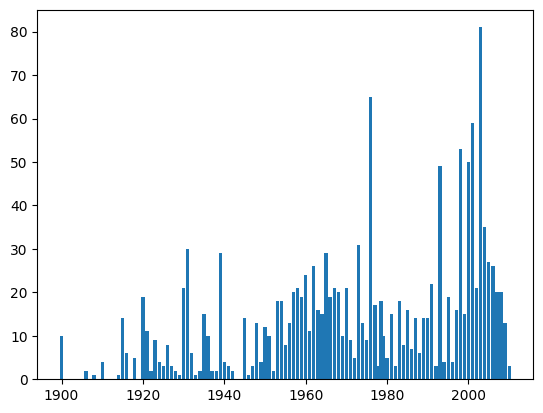

In [20]:
plt.bar(x=housing_df['GarageYrBlt'].unique(), height=housing_df['GarageYrBlt'].value_counts())

<Axes: xlabel='GarageYrBlt', ylabel='count'>

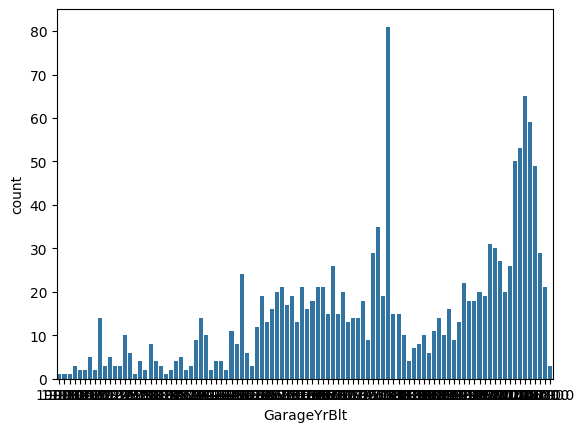

In [21]:
sns.countplot(x='GarageYrBlt', data=housing_df)

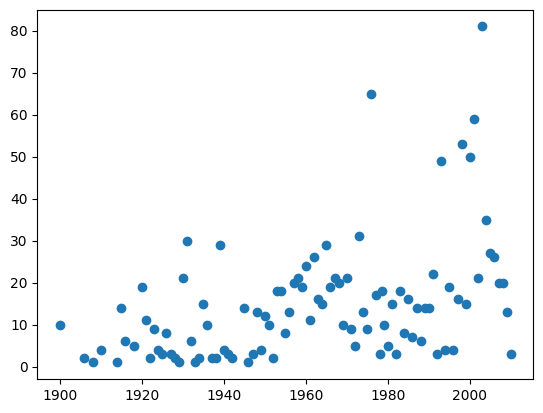

In [24]:
plt.scatter(x=housing_df['GarageYrBlt'].unique(), y=housing_df['GarageYrBlt'].value_counts())

In [26]:
cat_col.isna().sum().sort_values(ascending=False)

Alley            1369
MasVnrType        872
Electrical          1
MSSubClass          0
MSZoning            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Street              0
LotShape            0
BldgType            0
Condition2          0
RoofMatl            0
HouseStyle          0
Exterior1st         0
Exterior2nd         0
ExterQual           0
RoofStyle           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
ExterCond           0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
FireplaceQu         0
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC              0
Fence               0
MiscFeature         0
MoSold              0
SaleType            0
SaleCondition       0
dtype: int

In [27]:
housing_df['MasVnrType'].head()

0    BrkFace
1        NaN
2    BrkFace
3        NaN
4    BrkFace
Name: MasVnrType, dtype: object

In [28]:
housing_df['MasVnrType']=housing_df['MasVnrType'].fillna(housing_df['MasVnrType'].mode())

In [29]:
housing_df['MasVnrType'].isna().sum()

np.int64(872)

In [30]:
housing_df['SalePrice'].unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

In [31]:
housing_df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [33]:
housing_df['LotArea'].corr(housing_df['SalePrice'])

np.float64(0.2638433538714056)

In [35]:

housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
price_bins=[0,4000, 250000, 2500000,755000]
price_class=[['Class1','Class2','Class3','Class4']]